In [1]:
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.utils import shuffle

## Train same model as previous notebook

In [3]:
# Load simulated data: load complete training and validation sets.
np.random.seed(11)

# Training set should be one concatenated shuffled list of simulated examples
# Validation set similarly, but also keep information about simulation parameters
# to evaluate performance in specific simulation conditions.
bounds_files = glob.glob("../data/simulData/*_bmBounds.tab")
intensities_files = [re.sub(r"_bmBounds.tab$", "_intensities.tab", bounds_file)
                     for bounds_file in bounds_files]
y, x = shuffle(
    np.concatenate([np.loadtxt(bounds_file) for bounds_file in bounds_files]),
    np.concatenate([np.loadtxt(intensities_file) for intensities_file in intensities_files])
)

In [4]:
def overlap_metric(y_true, y_predicted):
    y_pred_round = tf.round(y_predicted)
    max_start = tf.math.maximum(y_true[:, 0], y_pred_round[:, 0])
    min_end = tf.math.minimum(y_true[:, 1], y_pred_round[:,1])
    overlap = tf.math.maximum(0.0, min_end - max_start)
    longest_bounds = tf.math.maximum(
        y_true[:, 1] + 1 - y_true[:, 0], 
        y_pred_round[:, 1] + 1 - y_pred_round[:, 0]
        )
    return overlap / longest_bounds

In [5]:
model = tf.keras.Sequential([
        layers.Dense(40, activation='relu'),
        layers.Dense(2, activation='linear')
    ])
model.compile(
    optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
    loss='mse',
    metrics=['mae', overlap_metric]
    )

In [6]:
history = model.fit(x, y, epochs=1000, batch_size=8192, validation_split=0.33)

Train on 60299 samples, validate on 29701 samples
Epoch 1/1000
60299/60299 [==============================] - 1s 14us/step - loss: 1130.7659 - mean_absolute_error: 26.5142 - overlap_metric: 0.0242 - val_loss: 288.6478 - val_mean_absolute_error: 12.8806 - val_overlap_metric: 0.0741
Epoch 2/1000
60299/60299 [==============================] - 0s 1us/step - loss: 251.6979 - mean_absolute_error: 12.4547 - overlap_metric: 0.1028 - val_loss: 168.2204 - val_mean_absolute_error: 10.7154 - val_overlap_metric: 0.0525
Epoch 3/1000
60299/60299 [==============================] - 0s 1us/step - loss: 130.5023 - mean_absolute_error: 9.0802 - overlap_metric: 0.0818 - val_loss: 99.2263 - val_mean_absolute_error: 7.6467 - val_overlap_metric: 0.1699
Epoch 4/1000
60299/60299 [==============================] - 0s 1us/step - loss: 80.6301 - mean_absolute_error: 6.9042 - overlap_metric: 0.1710 - val_loss: 65.5959 - val_mean_absolute_error: 6.4265 - val_overlap_metric: 0.1165
Epoch 5/1000
60299/60299 [=========

Epoch 37/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.5772 - mean_absolute_error: 2.1358 - overlap_metric: 0.4546 - val_loss: 7.4172 - val_mean_absolute_error: 2.1130 - val_overlap_metric: 0.4629
Epoch 38/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.4528 - mean_absolute_error: 2.1174 - overlap_metric: 0.4597 - val_loss: 7.3194 - val_mean_absolute_error: 2.0996 - val_overlap_metric: 0.4551
Epoch 39/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.3466 - mean_absolute_error: 2.1018 - overlap_metric: 0.4602 - val_loss: 7.1810 - val_mean_absolute_error: 2.0772 - val_overlap_metric: 0.4678
Epoch 40/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.2320 - mean_absolute_error: 2.0841 - overlap_metric: 0.4638 - val_loss: 7.0720 - val_mean_absolute_error: 2.0600 - val_overlap_metric: 0.4704
Epoch 41/1000
60299/60299 [==============================] - 0s 1us/step - loss: 7.1184 - mean_absol

60299/60299 [==============================] - 0s 1us/step - loss: 5.5796 - mean_absolute_error: 1.8146 - overlap_metric: 0.5103 - val_loss: 5.5381 - val_mean_absolute_error: 1.8117 - val_overlap_metric: 0.5065
Epoch 74/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.5604 - mean_absolute_error: 1.8113 - overlap_metric: 0.5101 - val_loss: 5.5124 - val_mean_absolute_error: 1.8046 - val_overlap_metric: 0.5059
Epoch 75/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.5397 - mean_absolute_error: 1.8076 - overlap_metric: 0.5111 - val_loss: 5.4961 - val_mean_absolute_error: 1.8017 - val_overlap_metric: 0.5045
Epoch 76/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.5225 - mean_absolute_error: 1.8046 - overlap_metric: 0.5109 - val_loss: 5.4900 - val_mean_absolute_error: 1.7998 - val_overlap_metric: 0.5175
Epoch 77/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.5070 - mean_absolute_error: 1.8

60299/60299 [==============================] - 0s 1us/step - loss: 5.1281 - mean_absolute_error: 1.7378 - overlap_metric: 0.5239 - val_loss: 5.1272 - val_mean_absolute_error: 1.7428 - val_overlap_metric: 0.5204
Epoch 110/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.1521 - mean_absolute_error: 1.7436 - overlap_metric: 0.5209 - val_loss: 5.1538 - val_mean_absolute_error: 1.7486 - val_overlap_metric: 0.5070
Epoch 111/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.1307 - mean_absolute_error: 1.7388 - overlap_metric: 0.5208 - val_loss: 5.0654 - val_mean_absolute_error: 1.7267 - val_overlap_metric: 0.5198
Epoch 112/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.0803 - mean_absolute_error: 1.7276 - overlap_metric: 0.5237 - val_loss: 5.0770 - val_mean_absolute_error: 1.7296 - val_overlap_metric: 0.5333
Epoch 113/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.0925 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.8789 - mean_absolute_error: 1.6912 - overlap_metric: 0.5295 - val_loss: 4.8380 - val_mean_absolute_error: 1.6846 - val_overlap_metric: 0.5300
Epoch 146/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.9045 - mean_absolute_error: 1.6985 - overlap_metric: 0.5277 - val_loss: 4.8780 - val_mean_absolute_error: 1.6890 - val_overlap_metric: 0.5210
Epoch 147/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.8665 - mean_absolute_error: 1.6884 - overlap_metric: 0.5300 - val_loss: 4.8345 - val_mean_absolute_error: 1.6833 - val_overlap_metric: 0.5318
Epoch 148/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.8581 - mean_absolute_error: 1.6877 - overlap_metric: 0.5305 - val_loss: 4.9237 - val_mean_absolute_error: 1.7091 - val_overlap_metric: 0.5186
Epoch 149/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.9384 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 5.0219 - mean_absolute_error: 1.7365 - overlap_metric: 0.5153 - val_loss: 5.3404 - val_mean_absolute_error: 1.8154 - val_overlap_metric: 0.5351
Epoch 182/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.9597 - mean_absolute_error: 1.9389 - overlap_metric: 0.4669 - val_loss: 5.4873 - val_mean_absolute_error: 1.8470 - val_overlap_metric: 0.5326
Epoch 183/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.9462 - mean_absolute_error: 1.7170 - overlap_metric: 0.5217 - val_loss: 4.9404 - val_mean_absolute_error: 1.7155 - val_overlap_metric: 0.4871
Epoch 184/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7587 - mean_absolute_error: 1.6731 - overlap_metric: 0.5279 - val_loss: 4.8341 - val_mean_absolute_error: 1.6877 - val_overlap_metric: 0.5363
Epoch 185/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7951 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.5128 - mean_absolute_error: 1.6226 - overlap_metric: 0.5398 - val_loss: 4.4859 - val_mean_absolute_error: 1.6202 - val_overlap_metric: 0.5463
Epoch 218/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5462 - mean_absolute_error: 1.6307 - overlap_metric: 0.5378 - val_loss: 4.9105 - val_mean_absolute_error: 1.7239 - val_overlap_metric: 0.5433
Epoch 219/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.2972 - mean_absolute_error: 1.8084 - overlap_metric: 0.4944 - val_loss: 4.9775 - val_mean_absolute_error: 1.7397 - val_overlap_metric: 0.5461
Epoch 220/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6747 - mean_absolute_error: 1.6622 - overlap_metric: 0.5318 - val_loss: 5.2647 - val_mean_absolute_error: 1.7941 - val_overlap_metric: 0.4424
Epoch 221/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.9851 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.3853 - mean_absolute_error: 1.6018 - overlap_metric: 0.5413 - val_loss: 4.3033 - val_mean_absolute_error: 1.5850 - val_overlap_metric: 0.5425
Epoch 254/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.3264 - mean_absolute_error: 1.5872 - overlap_metric: 0.5450 - val_loss: 4.5336 - val_mean_absolute_error: 1.6414 - val_overlap_metric: 0.5495
Epoch 255/1000
60299/60299 [==============================] - 0s 1us/step - loss: 5.4460 - mean_absolute_error: 1.8487 - overlap_metric: 0.4869 - val_loss: 5.0305 - val_mean_absolute_error: 1.7623 - val_overlap_metric: 0.5448
Epoch 256/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7547 - mean_absolute_error: 1.6929 - overlap_metric: 0.5207 - val_loss: 4.7744 - val_mean_absolute_error: 1.7032 - val_overlap_metric: 0.4988
Epoch 257/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6933 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.2835 - mean_absolute_error: 1.5823 - overlap_metric: 0.5431 - val_loss: 4.2559 - val_mean_absolute_error: 1.5830 - val_overlap_metric: 0.5443
Epoch 290/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.7038 - mean_absolute_error: 1.6912 - overlap_metric: 0.5195 - val_loss: 4.1835 - val_mean_absolute_error: 1.5569 - val_overlap_metric: 0.5451
Epoch 291/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6407 - mean_absolute_error: 1.6733 - overlap_metric: 0.5224 - val_loss: 4.1529 - val_mean_absolute_error: 1.5547 - val_overlap_metric: 0.5543
Epoch 292/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.3370 - mean_absolute_error: 1.5984 - overlap_metric: 0.5401 - val_loss: 4.2299 - val_mean_absolute_error: 1.5726 - val_overlap_metric: 0.5567
Epoch 293/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.5363 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.0358 - mean_absolute_error: 1.5284 - overlap_metric: 0.5547 - val_loss: 4.0322 - val_mean_absolute_error: 1.5312 - val_overlap_metric: 0.5534
Epoch 326/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0687 - mean_absolute_error: 1.5369 - overlap_metric: 0.5531 - val_loss: 4.6469 - val_mean_absolute_error: 1.6871 - val_overlap_metric: 0.5487
Epoch 327/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.6867 - mean_absolute_error: 1.6954 - overlap_metric: 0.5211 - val_loss: 4.0796 - val_mean_absolute_error: 1.5443 - val_overlap_metric: 0.5511
Epoch 328/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.8256 - mean_absolute_error: 1.7263 - overlap_metric: 0.5131 - val_loss: 4.1579 - val_mean_absolute_error: 1.5616 - val_overlap_metric: 0.5314
Epoch 329/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.4806 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 4.1809 - mean_absolute_error: 1.5712 - overlap_metric: 0.5425 - val_loss: 4.2234 - val_mean_absolute_error: 1.5867 - val_overlap_metric: 0.5611
Epoch 362/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0360 - mean_absolute_error: 1.5342 - overlap_metric: 0.5531 - val_loss: 3.9290 - val_mean_absolute_error: 1.5048 - val_overlap_metric: 0.5544
Epoch 363/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0945 - mean_absolute_error: 1.5498 - overlap_metric: 0.5489 - val_loss: 3.9763 - val_mean_absolute_error: 1.5234 - val_overlap_metric: 0.5466
Epoch 364/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0683 - mean_absolute_error: 1.5440 - overlap_metric: 0.5498 - val_loss: 3.9229 - val_mean_absolute_error: 1.5080 - val_overlap_metric: 0.5652
Epoch 365/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9396 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.9733 - mean_absolute_error: 1.5238 - overlap_metric: 0.5547 - val_loss: 3.9642 - val_mean_absolute_error: 1.5194 - val_overlap_metric: 0.5612
Epoch 398/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9427 - mean_absolute_error: 1.5144 - overlap_metric: 0.5563 - val_loss: 3.8965 - val_mean_absolute_error: 1.5064 - val_overlap_metric: 0.5498
Epoch 399/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.8469 - mean_absolute_error: 1.4906 - overlap_metric: 0.5592 - val_loss: 3.8256 - val_mean_absolute_error: 1.4872 - val_overlap_metric: 0.5581
Epoch 400/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.8270 - mean_absolute_error: 1.4852 - overlap_metric: 0.5611 - val_loss: 3.8278 - val_mean_absolute_error: 1.4848 - val_overlap_metric: 0.5624
Epoch 401/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.8416 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.7944 - mean_absolute_error: 1.4800 - overlap_metric: 0.5626 - val_loss: 3.7860 - val_mean_absolute_error: 1.4792 - val_overlap_metric: 0.5504
Epoch 434/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7625 - mean_absolute_error: 1.4720 - overlap_metric: 0.5620 - val_loss: 3.8744 - val_mean_absolute_error: 1.5014 - val_overlap_metric: 0.5635
Epoch 435/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9011 - mean_absolute_error: 1.5079 - overlap_metric: 0.5571 - val_loss: 4.0748 - val_mean_absolute_error: 1.5600 - val_overlap_metric: 0.5480
Epoch 436/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.9881 - mean_absolute_error: 1.5319 - overlap_metric: 0.5536 - val_loss: 3.8369 - val_mean_absolute_error: 1.4874 - val_overlap_metric: 0.5657
Epoch 437/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7672 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.6076 - mean_absolute_error: 1.4360 - overlap_metric: 0.5686 - val_loss: 3.7304 - val_mean_absolute_error: 1.4602 - val_overlap_metric: 0.5580
Epoch 470/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1333 - mean_absolute_error: 1.5692 - overlap_metric: 0.5466 - val_loss: 3.8756 - val_mean_absolute_error: 1.5048 - val_overlap_metric: 0.5631
Epoch 471/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7124 - mean_absolute_error: 1.4653 - overlap_metric: 0.5625 - val_loss: 3.7603 - val_mean_absolute_error: 1.4747 - val_overlap_metric: 0.5750
Epoch 472/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6911 - mean_absolute_error: 1.4567 - overlap_metric: 0.5651 - val_loss: 3.8598 - val_mean_absolute_error: 1.5005 - val_overlap_metric: 0.5637
Epoch 473/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.8261 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.9190 - mean_absolute_error: 1.5211 - overlap_metric: 0.5558 - val_loss: 3.6558 - val_mean_absolute_error: 1.4556 - val_overlap_metric: 0.5726
Epoch 506/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1525 - mean_absolute_error: 1.5757 - overlap_metric: 0.5467 - val_loss: 5.2707 - val_mean_absolute_error: 1.8337 - val_overlap_metric: 0.5256
Epoch 507/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1931 - mean_absolute_error: 1.5878 - overlap_metric: 0.5456 - val_loss: 4.1202 - val_mean_absolute_error: 1.5727 - val_overlap_metric: 0.5542
Epoch 508/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7606 - mean_absolute_error: 1.4781 - overlap_metric: 0.5637 - val_loss: 3.5863 - val_mean_absolute_error: 1.4297 - val_overlap_metric: 0.5694
Epoch 509/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.5588 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.4994 - mean_absolute_error: 1.4177 - overlap_metric: 0.5716 - val_loss: 3.4047 - val_mean_absolute_error: 1.3920 - val_overlap_metric: 0.5804
Epoch 542/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.1176 - mean_absolute_error: 1.5618 - overlap_metric: 0.5501 - val_loss: 3.7929 - val_mean_absolute_error: 1.4991 - val_overlap_metric: 0.5671
Epoch 543/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.2623 - mean_absolute_error: 1.6019 - overlap_metric: 0.5434 - val_loss: 4.0018 - val_mean_absolute_error: 1.5420 - val_overlap_metric: 0.5662
Epoch 544/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.0721 - mean_absolute_error: 1.5646 - overlap_metric: 0.5495 - val_loss: 3.4517 - val_mean_absolute_error: 1.4041 - val_overlap_metric: 0.5769
Epoch 545/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7348 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.6517 - mean_absolute_error: 1.4617 - overlap_metric: 0.5655 - val_loss: 3.4198 - val_mean_absolute_error: 1.4080 - val_overlap_metric: 0.5695
Epoch 578/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4360 - mean_absolute_error: 1.4081 - overlap_metric: 0.5729 - val_loss: 3.3425 - val_mean_absolute_error: 1.3888 - val_overlap_metric: 0.5772
Epoch 579/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4166 - mean_absolute_error: 1.3999 - overlap_metric: 0.5745 - val_loss: 3.4556 - val_mean_absolute_error: 1.4027 - val_overlap_metric: 0.5749
Epoch 580/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3174 - mean_absolute_error: 1.3747 - overlap_metric: 0.5787 - val_loss: 3.2493 - val_mean_absolute_error: 1.3587 - val_overlap_metric: 0.5815
Epoch 581/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3699 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.3276 - mean_absolute_error: 1.3831 - overlap_metric: 0.5771 - val_loss: 3.7465 - val_mean_absolute_error: 1.4790 - val_overlap_metric: 0.5531
Epoch 614/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.5986 - mean_absolute_error: 1.4493 - overlap_metric: 0.5664 - val_loss: 3.4781 - val_mean_absolute_error: 1.4281 - val_overlap_metric: 0.5694
Epoch 615/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3908 - mean_absolute_error: 1.4027 - overlap_metric: 0.5740 - val_loss: 3.4136 - val_mean_absolute_error: 1.4158 - val_overlap_metric: 0.5646
Epoch 616/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3922 - mean_absolute_error: 1.4016 - overlap_metric: 0.5734 - val_loss: 3.3678 - val_mean_absolute_error: 1.3837 - val_overlap_metric: 0.5702
Epoch 617/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3277 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.1676 - mean_absolute_error: 1.3411 - overlap_metric: 0.5840 - val_loss: 3.2049 - val_mean_absolute_error: 1.3544 - val_overlap_metric: 0.5847
Epoch 650/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1873 - mean_absolute_error: 1.3486 - overlap_metric: 0.5821 - val_loss: 3.2297 - val_mean_absolute_error: 1.3589 - val_overlap_metric: 0.5824
Epoch 651/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3590 - mean_absolute_error: 1.3966 - overlap_metric: 0.5743 - val_loss: 3.2470 - val_mean_absolute_error: 1.3696 - val_overlap_metric: 0.5891
Epoch 652/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3825 - mean_absolute_error: 1.4013 - overlap_metric: 0.5731 - val_loss: 3.3029 - val_mean_absolute_error: 1.3856 - val_overlap_metric: 0.5854
Epoch 653/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1906 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.0068 - mean_absolute_error: 1.2990 - overlap_metric: 0.5874 - val_loss: 3.0559 - val_mean_absolute_error: 1.3105 - val_overlap_metric: 0.5702
Epoch 686/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.0264 - mean_absolute_error: 1.3071 - overlap_metric: 0.5868 - val_loss: 2.9875 - val_mean_absolute_error: 1.2999 - val_overlap_metric: 0.5892
Epoch 687/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.9656 - mean_absolute_error: 1.2897 - overlap_metric: 0.5900 - val_loss: 2.9508 - val_mean_absolute_error: 1.2892 - val_overlap_metric: 0.5982
Epoch 688/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.6324 - mean_absolute_error: 1.4678 - overlap_metric: 0.5623 - val_loss: 3.7906 - val_mean_absolute_error: 1.5009 - val_overlap_metric: 0.5765
Epoch 689/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3996 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.9152 - mean_absolute_error: 1.5419 - overlap_metric: 0.5521 - val_loss: 3.6640 - val_mean_absolute_error: 1.4943 - val_overlap_metric: 0.5606
Epoch 722/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3259 - mean_absolute_error: 1.3938 - overlap_metric: 0.5760 - val_loss: 3.3158 - val_mean_absolute_error: 1.3941 - val_overlap_metric: 0.5776
Epoch 723/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2597 - mean_absolute_error: 1.3730 - overlap_metric: 0.5777 - val_loss: 2.8898 - val_mean_absolute_error: 1.2715 - val_overlap_metric: 0.5966
Epoch 724/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1042 - mean_absolute_error: 1.3290 - overlap_metric: 0.5855 - val_loss: 3.4557 - val_mean_absolute_error: 1.4222 - val_overlap_metric: 0.5725
Epoch 725/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.0272 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 3.0247 - mean_absolute_error: 1.3029 - overlap_metric: 0.5885 - val_loss: 2.9548 - val_mean_absolute_error: 1.2916 - val_overlap_metric: 0.5985
Epoch 758/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.9174 - mean_absolute_error: 1.2776 - overlap_metric: 0.5946 - val_loss: 2.8894 - val_mean_absolute_error: 1.2706 - val_overlap_metric: 0.5888
Epoch 759/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.8673 - mean_absolute_error: 1.2624 - overlap_metric: 0.5956 - val_loss: 2.8626 - val_mean_absolute_error: 1.2632 - val_overlap_metric: 0.5976
Epoch 760/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.8553 - mean_absolute_error: 1.2616 - overlap_metric: 0.5970 - val_loss: 2.8544 - val_mean_absolute_error: 1.2571 - val_overlap_metric: 0.5979
Epoch 761/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.8225 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 2.7906 - mean_absolute_error: 1.2463 - overlap_metric: 0.5990 - val_loss: 2.7471 - val_mean_absolute_error: 1.2330 - val_overlap_metric: 0.6022
Epoch 794/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.7914 - mean_absolute_error: 1.2455 - overlap_metric: 0.5993 - val_loss: 3.6650 - val_mean_absolute_error: 1.4966 - val_overlap_metric: 0.5677
Epoch 795/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.7803 - mean_absolute_error: 1.5115 - overlap_metric: 0.5557 - val_loss: 3.1350 - val_mean_absolute_error: 1.3434 - val_overlap_metric: 0.5822
Epoch 796/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1157 - mean_absolute_error: 1.3385 - overlap_metric: 0.5840 - val_loss: 3.0946 - val_mean_absolute_error: 1.3300 - val_overlap_metric: 0.5804
Epoch 797/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.8558 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 2.8691 - mean_absolute_error: 1.2708 - overlap_metric: 0.5948 - val_loss: 2.9038 - val_mean_absolute_error: 1.2831 - val_overlap_metric: 0.6003
Epoch 830/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.0018 - mean_absolute_error: 1.3101 - overlap_metric: 0.5892 - val_loss: 4.0072 - val_mean_absolute_error: 1.5660 - val_overlap_metric: 0.5284
Epoch 831/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.2801 - mean_absolute_error: 1.3854 - overlap_metric: 0.5754 - val_loss: 2.7883 - val_mean_absolute_error: 1.2469 - val_overlap_metric: 0.6031
Epoch 832/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.8696 - mean_absolute_error: 1.2692 - overlap_metric: 0.5955 - val_loss: 2.9377 - val_mean_absolute_error: 1.2912 - val_overlap_metric: 0.6012
Epoch 833/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.7889 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 2.8968 - mean_absolute_error: 1.2791 - overlap_metric: 0.5929 - val_loss: 2.8098 - val_mean_absolute_error: 1.2465 - val_overlap_metric: 0.5937
Epoch 866/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.6900 - mean_absolute_error: 1.2188 - overlap_metric: 0.6030 - val_loss: 2.7149 - val_mean_absolute_error: 1.2281 - val_overlap_metric: 0.6056
Epoch 867/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.6702 - mean_absolute_error: 1.2140 - overlap_metric: 0.6048 - val_loss: 2.9171 - val_mean_absolute_error: 1.2793 - val_overlap_metric: 0.5900
Epoch 868/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.3027 - mean_absolute_error: 1.3985 - overlap_metric: 0.5732 - val_loss: 2.7060 - val_mean_absolute_error: 1.2262 - val_overlap_metric: 0.6016
Epoch 869/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.9454 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 2.5839 - mean_absolute_error: 1.1893 - overlap_metric: 0.6087 - val_loss: 2.5729 - val_mean_absolute_error: 1.1833 - val_overlap_metric: 0.6098
Epoch 902/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.5705 - mean_absolute_error: 1.1837 - overlap_metric: 0.6099 - val_loss: 2.5742 - val_mean_absolute_error: 1.1800 - val_overlap_metric: 0.6077
Epoch 903/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.6745 - mean_absolute_error: 1.2162 - overlap_metric: 0.6045 - val_loss: 2.8077 - val_mean_absolute_error: 1.2625 - val_overlap_metric: 0.6036
Epoch 904/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1727 - mean_absolute_error: 1.3650 - overlap_metric: 0.5802 - val_loss: 2.7158 - val_mean_absolute_error: 1.2219 - val_overlap_metric: 0.6031
Epoch 905/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.8580 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 2.5011 - mean_absolute_error: 1.1650 - overlap_metric: 0.6133 - val_loss: 2.5027 - val_mean_absolute_error: 1.1629 - val_overlap_metric: 0.6126
Epoch 938/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.7204 - mean_absolute_error: 1.2320 - overlap_metric: 0.6017 - val_loss: 5.6674 - val_mean_absolute_error: 1.9671 - val_overlap_metric: 0.4602
Epoch 939/1000
60299/60299 [==============================] - 0s 1us/step - loss: 4.3715 - mean_absolute_error: 1.6466 - overlap_metric: 0.5325 - val_loss: 4.0078 - val_mean_absolute_error: 1.5945 - val_overlap_metric: 0.5412
Epoch 940/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.4201 - mean_absolute_error: 1.4269 - overlap_metric: 0.5705 - val_loss: 3.5136 - val_mean_absolute_error: 1.4525 - val_overlap_metric: 0.5771
Epoch 941/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.5899 - mean_absolute_error:

60299/60299 [==============================] - 0s 1us/step - loss: 2.6174 - mean_absolute_error: 1.2063 - overlap_metric: 0.6067 - val_loss: 2.9652 - val_mean_absolute_error: 1.3177 - val_overlap_metric: 0.5981
Epoch 974/1000
60299/60299 [==============================] - 0s 1us/step - loss: 3.1742 - mean_absolute_error: 1.3679 - overlap_metric: 0.5803 - val_loss: 2.9437 - val_mean_absolute_error: 1.2927 - val_overlap_metric: 0.5855
Epoch 975/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.7728 - mean_absolute_error: 1.2516 - overlap_metric: 0.5988 - val_loss: 2.6962 - val_mean_absolute_error: 1.2280 - val_overlap_metric: 0.6093
Epoch 976/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.6757 - mean_absolute_error: 1.2218 - overlap_metric: 0.6044 - val_loss: 2.5175 - val_mean_absolute_error: 1.1746 - val_overlap_metric: 0.6133
Epoch 977/1000
60299/60299 [==============================] - 0s 1us/step - loss: 2.5138 - mean_absolute_error:

Check same metrics as previous notebook.

In [7]:
print("Mean absolute error", history.history['val_mean_absolute_error'][-1])
print("Overlap metric", history.history['val_overlap_metric'][-1])

Mean absolute error 1.4576315986143251
Overlap metric 0.5703629061616329


## Validation on different datasets

Simulated datasets, separately

In [8]:
bounds_files = glob.glob("../data/simulData/*_bmBounds.tab")
intensities_files = [re.sub(r"_bmBounds.tab$", "_intensities.tab", bounds_file)
                     for bounds_file in bounds_files]

In [9]:
adiposities = []
scales = []
overlaps = []
for bounds_file, intensities_file in zip(bounds_files, intensities_files):
    test_y, test_x = shuffle(np.loadtxt(bounds_file), np.loadtxt(intensities_file))
    values = model.evaluate(test_x, test_y)
    m = re.search(r"/scale(.*)-adip(.*)_bmBounds.tab$", bounds_file)
    scale, adip = [float(x) for x in m.groups()]
    overlap_index = model.metrics_names.index("overlap_metric")
    overlap = values[overlap_index]
    overlaps.append(overlap)
    adiposities.append(adip)
    scales.append(scale)

10000/10000 [==============================] - 0s 46us/step


In [11]:
ao_data = zip(adiposities, overlaps)
a, o = zip(*sorted(ao_data))

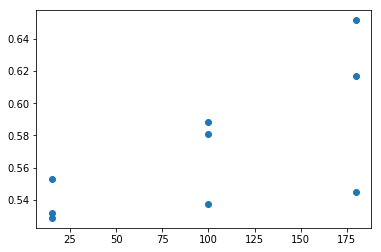

In [12]:
plt.plot(a, o, 'o')
plt.show()

In [14]:
so_data = zip(scales, overlaps)
s, o = zip(*sorted(so_data))

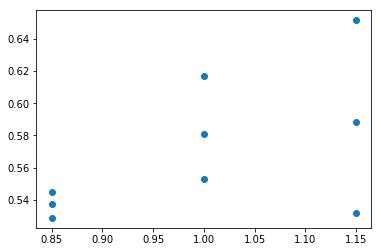

In [15]:
plt.plot(s, o, 'o')
plt.show()

## Real data predictions

In [ ]:
real_data_file = "../data/realData/FS_1334172_layers.csv"
raw = np.loadtxt(real_data_file, delimiter=";")
real_data = np.transpose(raw)
preds = model.predict(real_data)

In [ ]:
np.savetxt("../data/predictions.txt", preds, fmt="%d")